In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Combine the data into a single dataset
mouse_df_1=pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_df_1.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(mouse_df_1['Mouse ID'].value_counts())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_df_1[mouse_df_1.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
mouse_df_1[mouse_df_1["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
All_duplicate_mice = mouse_df_1[mouse_df_1.duplicated(subset=['Mouse ID'])]
All_duplicate_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
250,a275,5,46.795257,0,Ceftamin,Female,20,28
251,w575,5,48.913860,1,Zoniferol,Female,16,28
252,x822,5,45.671104,1,Ceftamin,Male,3,29
253,l509,5,45.851193,0,Capomulin,Male,17,21


In [7]:
# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_duplicate_mice = mouse_df_1.drop_duplicates("Mouse ID")
# clean_duplicate_mice.head()

In [8]:
clean_mice = mouse_df_1.loc[mouse_df_1["Mouse ID"] != "g989"]
len(clean_mice["Mouse ID"].value_counts())

248

In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mouse_groupby_Drug=mouse_df_1.groupby(['Drug Regimen'])  
summary_stat_df = pd.DataFrame({'Mean Tumor Volume': mouse_groupby_Drug['Tumor Volume (mm3)'].mean(),
                                  'Median Tumor Volume': mouse_groupby_Drug['Tumor Volume (mm3)'].median(),
                                  'Tumor Volume Variance': mouse_groupby_Drug['Tumor Volume (mm3)'].var(),
                                  'Tumor Volume Std. Dev.': mouse_groupby_Drug['Tumor Volume (mm3)'].std(),
                                   'Tumor Volume Std. Err.': mouse_groupby_Drug['Tumor Volume (mm3)'].sem()
                               })
summary_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = summary_stat_df.rename(columns={'Mean Tumor Volume': 'mean',
                                             'Median Tumor Volume': 'median',
                                             'Tumor Volume Variance': 'var',
                                             'Tumor Volume Std. Dev.': 'std',
                                             'Tumor Volume Std. Err.': 'sem'
                                             })
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_df=pd.DataFrame(mouse_df_1.groupby(["Drug Regimen"]).count()).reset_index()
drugs_two_df = drug_df[["Drug Regimen", "Mouse ID"]]
drugs_barchart_df = drugs_two_df.set_index("Drug Regimen")
drugs_barchart_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


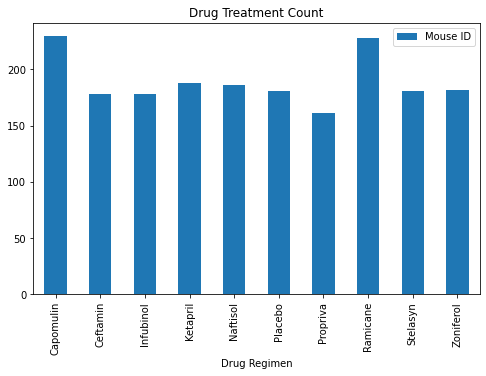

<Figure size 432x288 with 0 Axes>

In [13]:
drugs_barchart_df.plot(kind="bar", figsize=(8,5))
plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()

In [14]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.

In [15]:
import numpy as np

In [16]:
x_axis=np.arange(len(drugs_barchart_df))
tick_location=['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva',
 'Ramicane','Stelasyn','Zoniferol']
y_axis=(drugs_barchart_df['Mouse ID']).tolist()
y_axis

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

<Figure size 1440x1080 with 0 Axes>

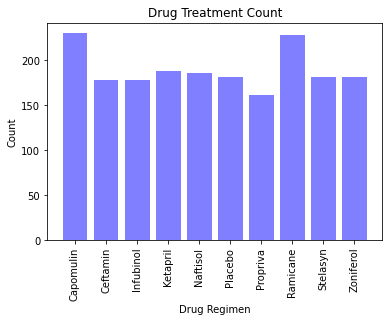

<Figure size 1440x1080 with 0 Axes>

In [17]:
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(x_axis, tick_location,  rotation="vertical")
plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.figure(figsize=(20,15))

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(mouse_df_1.groupby(["Sex"]).count()).reset_index()
gender_df

,Sex,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [19]:
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

<Figure size 864x432 with 0 Axes>

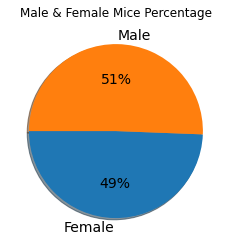

In [20]:
plt.figure(figsize=(12,6))
gender_df.plot(kind="pie", y = "Mouse ID", autopct='%1.0f%%',
              startangle=180, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

In [22]:
gender_count =gender_df['Mouse ID'].tolist()
gender_count

[935, 958]

In [23]:
labels = ["Female", "Male"]
colors = ["red", "green"]
explode = (0, 0)

(-1.1002172082078998,
 1.1045613723658971,
 -1.105172849624489,
 1.1027130801595115)

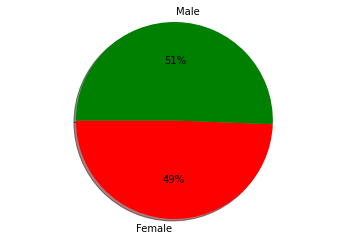

In [24]:
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.0f%%", 
        shadow=True, startangle=180)
plt.axis("equal")

In [48]:
#Quartiles, Outliers and Boxplots

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

sorted_df = clean_mice.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
last_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1764,b128,45,38.982878,2,Capomulin,Female,9,22
1,1829,b742,45,38.939633,0,Capomulin,Male,7,21
2,1777,g288,45,37.074024,1,Capomulin,Male,3,19
3,1791,g316,45,40.159220,2,Capomulin,Female,22,22
4,1878,i557,45,47.685963,1,Capomulin,Female,1,24


In [49]:
capo_df = mouse_df_1[mouse_df_1["Drug Regimen"].isin(["Capomulin"])]
capo_df.reset_index()
capo_obj = capo_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capo_obj = capo_obj["Tumor Volume (mm3)"]
capo_obj_df=capo_obj.to_frame()
capo_obj_df

,Tumor Volume (mm3)
0,23.343598
1,25.472143
2,28.167397
3,28.328531
4,28.430964
...,...
225,47.373423
226,47.488599
227,47.685963
228,48.070452


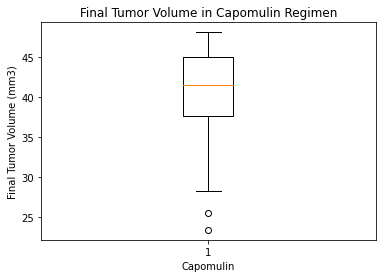

In [50]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Capomulin Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Capomulin")
ax1.boxplot(capo_obj)
plt.show()

In [51]:
quartiles = capo_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The Capomulin lower quartile of temperatures is: {lowerq}")
print(f"The Capomulin upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The Capomulin Values below {lower_bound} could be outliers.")
print(f"The Capomulin Values above {upper_bound} could be outliers.")

outlier_Capomulin = capo_obj_df.loc[
    (capo_obj_df['Tumor Volume (mm3)'] < lower_bound) | (capo_obj_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_Capomulin.head()

The Capomulin lower quartile of temperatures is: 37.685932865
The Capomulin upper quartile of temperatures is: 45.0
The interquartile range of temperatures is: 7.314067135000002
The the median of Capomulin is: 41.557808879999996 
The Capomulin Values below 26.714832162499995 could be outliers.
The Capomulin Values above 55.9711007025 could be outliers.


,Tumor Volume (mm3)
0,23.343598
1,25.472143


In [52]:
ram_df = mouse_df_1[mouse_df_1["Drug Regimen"].isin(["Ramicane"])]
ram_df.reset_index()
ram_obj = ram_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_obj = ram_obj["Tumor Volume (mm3)"]
ram_obj_df=ram_obj.to_frame()

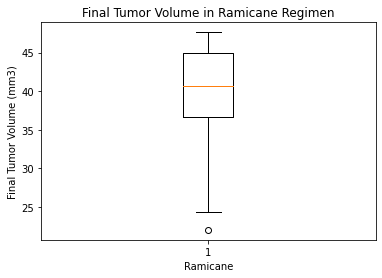

In [53]:
fig2, ax2 = plt.subplots()
ax2.set_title("Final Tumor Volume in Ramicane Regimen")
ax2.set_ylabel("Final Tumor Volume (mm3)")
ax2.set_xlabel("Ramicane")
ax2.boxplot(ram_obj)
plt.show()

In [54]:
quartiles = ram_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane Values below {lower_bound} could be outliers.")
print(f"Ramicane Values above {upper_bound} could be outliers.")

outlier_Ramicane = ram_obj_df.loc[
    (ram_obj_df['Tumor Volume (mm3)'] < lower_bound) | (ram_obj_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_Ramicane.head()

The lower quartile of Ramicane is: 36.67463458499999
The upper quartile of Ramicane is: 45.0
The interquartile range of Ramicane is: 8.325365415000007
The the median of Ramicane is: 40.67323554 
Ramicane Values below 24.18658646249998 could be outliers.
Ramicane Values above 57.48804812250001 could be outliers.


,Tumor Volume (mm3)
0,22.050126


In [55]:
Inf_df = mouse_df_1[mouse_df_1["Drug Regimen"].isin(["Infubinol"])]
Inf_df.reset_index()
Inf_obj = Inf_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
Inf_obj = Inf_obj["Tumor Volume (mm3)"]
Inf_obj_df=Inf_obj.to_frame()

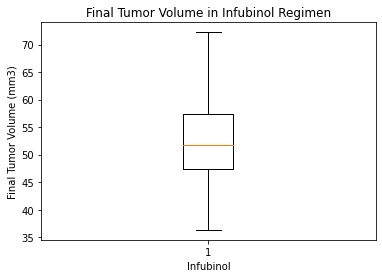

In [56]:
fig3, ax3 = plt.subplots()
ax3.set_title("Final Tumor Volume in Infubinol Regimen")
ax3.set_ylabel("Final Tumor Volume (mm3)")
ax3.set_xlabel("Infubinol")
ax3.boxplot(Inf_obj)
plt.show()

In [57]:
quartiles = Inf_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol Values below {lower_bound} could be outliers.")
print(f"Infubinol Values above {upper_bound} could be outliers.")

outlier_Infubinol = Inf_obj_df.loc[
    (Inf_obj_df['Tumor Volume (mm3)'] < lower_bound) | (Inf_obj_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_Infubinol.head()

The lower quartile of Infubinol is: 47.3123533
The upper quartile of Infubinol is: 57.314443967500004
The interquartile range of Infubinol is: 10.002090667500006
The the median of Infubinol is: 51.82058438 
Infubinol Values below 32.309217298749985 could be outliers.
Infubinol Values above 72.31757996875001 could be outliers.


,Tumor Volume (mm3)


In [58]:
cef_df = mouse_df_1[mouse_df_1["Drug Regimen"].isin(["Ceftamin"])]
cef_df.reset_index()
cef_obj = cef_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_obj = cef_obj["Tumor Volume (mm3)"]
cef_obj_df=cef_obj.to_frame()

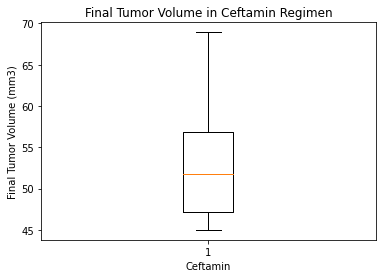

In [59]:
fig4, ax4 = plt.subplots()
ax4.set_title("Final Tumor Volume in Ceftamin Regimen")
ax4.set_ylabel("Final Tumor Volume (mm3)")
ax4.set_xlabel("Ceftamin")
ax4.boxplot(cef_obj)
plt.show()

In [60]:
quartiles = cef_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin Values below {lower_bound} could be outliers.")
print(f"Ceftamin Values above {upper_bound} could be outliers.")

outlier_Ceftamin = cef_obj_df.loc[
    (cef_obj_df['Tumor Volume (mm3)'] < lower_bound) | (cef_obj_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_Ceftamin.head()

The lower quartile of Ceftamin is: 47.208427112500004
The upper quartile of Ceftamin is: 56.801437570000004
The interquartile range of Ceftamin is: 9.5930104575
The the median of Ceftamin is: 51.77615728 
Ceftamin Values below 32.818911426250004 could be outliers.
Ceftamin Values above 71.19095325625 could be outliers.


,Tumor Volume (mm3)


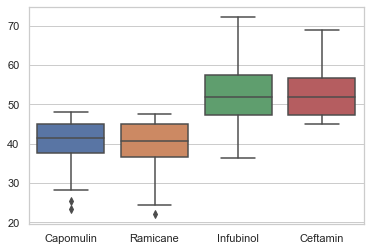

In [61]:
import seaborn as sns
total_df=pd.DataFrame({"Capomulin":capo_obj,
                      "Ramicane":ram_obj,
                      "Infubinol":Inf_obj,
                      "Ceftamin":cef_obj,})
sns.set_theme(style="whitegrid")
ax=sns.boxplot( data=total_df)

In [61]:
total_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,60.918767,59.741901
1,28.430964,29.128472,62.435404,59.851956
2,28.484033,30.276232,62.754451,61.386660
3,31.023923,30.564625,65.525743,61.433892
4,31.896238,30.638696,66.083066,61.849023
5,32.377357,31.095335,66.196912,62.999356
6,33.329098,31.560470,67.685569,64.299830
7,34.455298,32.978522,67.973419,64.634949
8,36.041047,33.397653,72.226731,64.729837
9,37.074024,33.562402,NaN,67.527482


In [79]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens(Capomulin, Ramicane, Infubinol, and Ceftamin). Calculate the IQR and quantitatively determine if there are any potential outliers.

#Calculating the Best Regimens
best_regimes = mouse_df[mouse_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

#Getting a smaller DF to work with
best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


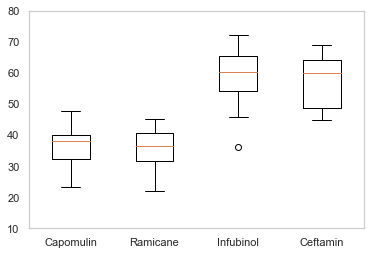

In [82]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Grouping by Regimen and Mouse ID 
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.grid(b=None)
plt.show()

In [70]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

In [88]:
#Line and Scatter Plots
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [83]:
capomulin_df = mouse_df_1.loc[mouse_df_1["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.0,0,Capomulin,Female,9,22
1,226,j246,0,45.0,0,Capomulin,Female,21,21
2,227,r554,0,45.0,0,Capomulin,Female,8,17
3,228,s185,0,45.0,0,Capomulin,Female,3,17
4,229,b742,0,45.0,0,Capomulin,Male,7,21


In [84]:
mouse_id=str(input("Which mouse are you lookinf for?"))

Which mouse are you lookinf for?b128


In [85]:
capo_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse_id]
capo_mouse

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
47,472,b128,5,45.651331,0,Capomulin,Female,9,22
70,679,b128,10,43.270852,0,Capomulin,Female,9,22
76,719,b128,15,43.784893,0,Capomulin,Female,9,22
101,933,b128,20,42.731552,0,Capomulin,Female,9,22
139,1268,b128,25,43.262145,1,Capomulin,Female,9,22
157,1400,b128,30,40.605335,1,Capomulin,Female,9,22
177,1547,b128,35,37.967644,1,Capomulin,Female,9,22
188,1629,b128,40,38.379726,2,Capomulin,Female,9,22
209,1764,b128,45,38.982878,2,Capomulin,Female,9,22


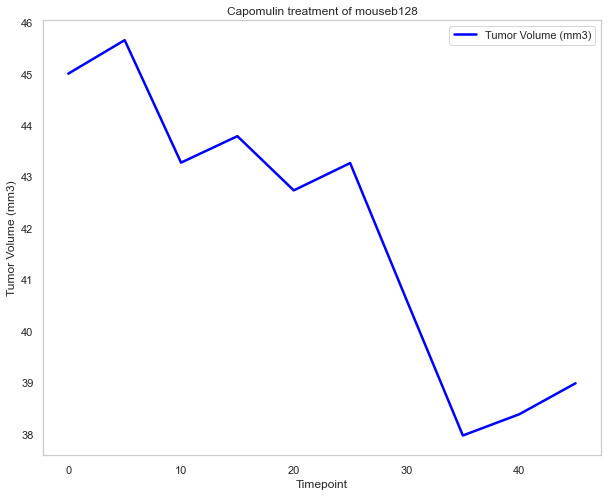

In [99]:
 #Arrange data into two columns
capo_mouse = capo_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#Now reset the index and generate a line plot showing the tumor volume for mice treated with Capomulin
capo_mouse = capo_mouse.reset_index(drop=True)
treated_chart=capo_mouse.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="blue")
treated_chart.set_ylabel("Tumor Volume (mm3)")
treated_chart.set_title("Capomulin treatment of mouse" + mouse_id )
plt.grid(b=None)

In [87]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,45.0
1,j246,21,45.0
2,r554,17,45.0
3,s185,17,45.0
4,b742,21,45.0


In [88]:
avg_capo = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capo = avg_capo.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_capo.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


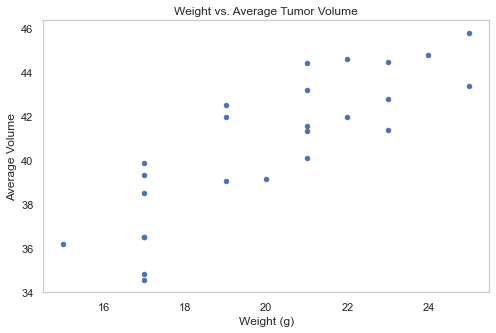

In [89]:
avg_capo.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=False, figsize=(8,5), 
              title="Weight vs. Average Tumor Volume")
plt.show()

In [90]:
# Correlation and Regression
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [96]:
mouse_weight = avg_capo.iloc[:,1]
avg_tumor_volume = avg_capo.iloc[:,2]

In [97]:
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


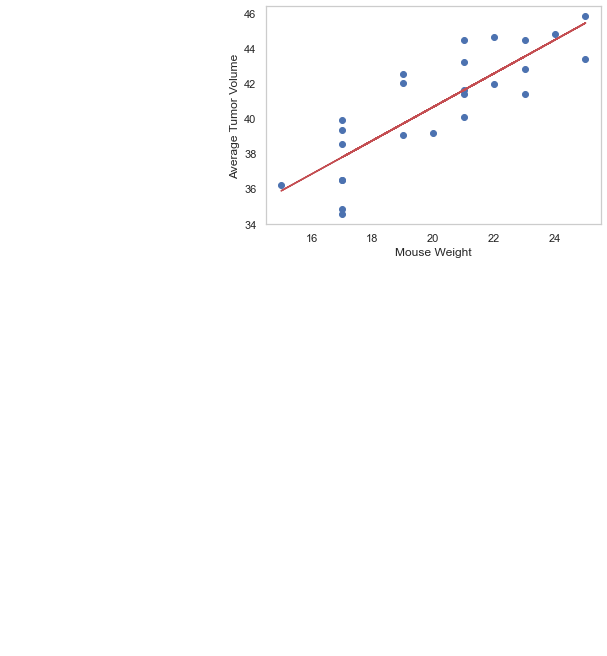

In [100]:
from scipy.stats import linregress

# Add the lineear regression equation and line to the scatter plot
x_values = avg_capo["Weight (g)"]
y_values = avg_capo["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.grid(b=None)
plt.show()